In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)           # To get different different  colors         
pd.set_option('display.max_columns',None) # To display the max columns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

## Read the preprocessd data

In [2]:
data=pd.read_csv("preprocessd_data.csv")    
data

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn
0,0,-0.264643,-0.946659,0,0,-1.508785,0.722258,-0.944404,-1.403000,-0.415473,0
1,0,0.029654,1.235009,0,0,0.304821,-0.901748,-0.688523,-0.599124,0.347522,0
2,0,2.580235,0.658246,0,0,-2.266627,0.613991,-0.483818,-1.403000,2.636507,1
3,0,-1.441834,0.783629,0,1,0.638123,-0.252146,0.079121,-0.197185,1.110517,0
4,0,0.127754,2.288228,0,0,-0.333851,0.253101,-0.893228,1.008630,-0.415473,0
...,...,...,...,...,...,...,...,...,...,...,...
3401,1,-0.805656,0.479710,0,0,0.887802,0.552184,0.865765,-0.495634,-0.415473,1
3402,0,0.477826,0.674425,0,0,2.038061,-0.931071,0.567257,2.100185,0.235227,1
3403,0,-0.550521,0.426099,0,1,-0.410669,0.344847,-0.729485,-0.403904,1.873512,1
3404,0,0.004651,-0.444637,0,0,1.359751,-0.847121,-0.715010,-0.197185,-1.178468,1


## Step - 1:

### Divide data into input and target data

In [3]:
# Here the target column is Churn
X = data.drop('churn', axis=1)
y = data['churn']

In [4]:
X.shape, y.shape

((3406, 10), (3406,))

## Step - 2:

### Train-Test-Split

In [5]:
# test size=0.2 , train data 80% and test data 20%
# random state=0 will split the data randomly

X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2724, 10)
(682, 10)
(2724,)
(682,)


## Step-3:

### Removing the outliers using z-score

In [6]:
from scipy import stats

# Define the columns for which you want to remove outlier
selected_columns = ['no_of_days_subscribed','age','customer_support_calls','weekly_max_night_mins']

# Calculate the z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for the outlier detection (e.g.,3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])



In [7]:
X_train.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls
2171,0,-1.334551,-0.404738,0,0,1.089588,0.114425,-2.195064,-0.379339,1.527731
1739,1,-0.951338,-0.495280,0,1,-0.251922,0.180923,-0.842052,-0.197185,1.873512
3386,0,-0.589808,-0.688786,1,0,-0.338931,1.521388,1.086544,1.008630,-0.415473
1650,1,-0.951338,-0.470203,0,0,0.343924,0.072656,-1.507343,0.606692,0.347522
932,0,-0.558941,-0.369897,0,0,1.060801,0.433546,-1.149109,1.008630,0.347522


## Without hyperparameter tunning

### Decision Tree

In [8]:
# We are not providing any parameters
# We are using the default parameters

In [9]:
# Model develop
# predictions
# evalution
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
y_pred_dt=dtree.predict(X_test)
print(y_pred_dt[:10])
print(y_test.values[:10])

[0 1 1 0 0 0 1 0 1 1]
[0 1 1 0 0 0 0 0 1 1]


In [11]:
acc_dt=round(accuracy_score(y_test,y_pred_dt),2)
acc_dt

0.85

In [12]:
confusion_matrix(y_test,y_pred_dt)

array([[306,  56],
       [ 45, 275]], dtype=int64)

In [13]:
tn, fp, fn, tp =confusion_matrix(y_test,y_pred_dt).ravel()
# TP=2490
# TN=521
# FP=141
# FN=106
# print(tn,fp,fn,tp)
acc=(tn+tp)/(tn,tp,fp,fn)
precision= tp/(tp+fn)
recall=tp/(tp+fn)
f1=(2*precision*recall)/(precision+recall)
print(acc,precision,recall,f1)

[ 1.89869281  2.11272727 10.375      12.91111111] 0.859375 0.859375 0.859375


In [14]:
print(accuracy_score(y_test,y_pred_dt))
print(precision_score(y_test,y_pred_dt))
print(recall_score(y_test,y_pred_dt))
print(f1_score(y_test,y_pred_dt))

0.8519061583577713
0.8308157099697885
0.859375
0.8448540706605223


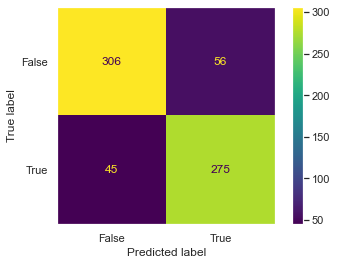

In [15]:
cmt=confusion_matrix(y_test,y_pred_dt)
ConfusionMatrixDisplay(cmt,display_labels = [False, True]).plot()
plt.grid(False)

In [16]:
#ROC-Auc
# X-axis: FPR
# y-axis: TPR

In [17]:
y_pred_dt # This will not useful roc auc curve

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,

In [18]:
dtree.predict_proba(X_test)
# col=1  col=2
# col=1 related
# [0.,1.]
# When you pass one observation X_test === No Yes
# P(No)=0
# P(Yes)=1
# Final answer =1

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [19]:
# class 0 and class 1
# we need to extract only class-1 prob
y_pred_prob=dtree.predict_proba(X_test)[:,1] # TP =====>

# y_score === probability

y_pred_dt=dtree.predict(X_test)
accuracy_score(y_test,y_pred_dt)

0.8519061583577713

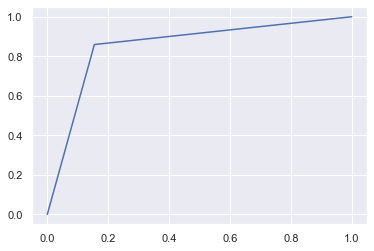

In [20]:
y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]  # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob)
plt.plot(fpr,tpr)


accuracy is: 85.19
F1 is: 0.85
Precision is: 0.86
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       362
           1       0.83      0.86      0.85       320

    accuracy                           0.85       682
   macro avg       0.85      0.85      0.85       682
weighted avg       0.85      0.85      0.85       682



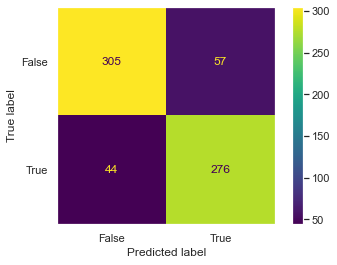

True negative: 305
False positive: 57
False negative: 44
True positive: 276


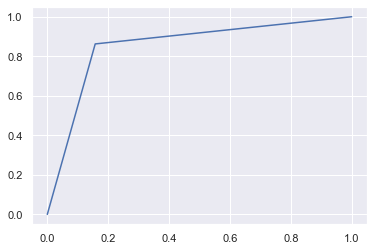

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

# ============================Step-5: Predictions==========================================

y_pred_dt=dtree.predict(X_test)

# =============================Step-6: Metrics=============================================

acc_dt=round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)

print("accuracy is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",recall_dt)
print(classification_report(y_test,y_pred_dt))


# ================================Step-7:Confusion matrix=======================================

cmt=confusion_matrix(y_test,y_pred_dt)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                           display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False positive:",fp)
print("False negative:",fn)
print("True positive:",tp)

# ================================Step-8: ROC-AUC curve=============================================

y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]  # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob)
plt.plot(fpr,tpr)

